# **Logistic Regression**

## **Agenda**

we will cover the following concepts with the help of a business use case:
* EDA (Exploratory Data Analysis)
* Data Cleaning 
* Logistic Regression with Sklearn

## **Use Case: Logistic Regression**

Note: At first, with the help of a use case, we are going to perform all the basic steps to reach the training and predicition part.

### **Problem Statement**



One of the aspects Seattle is most notable for, in addition to coffee, grunge, and electronic businesses, is its rains. From January 1, 1948 to December 12, 2017, this dataset provides full records of Seattle's daily rainfall patterns.



### **Data Dictionary**

Following are the variables with their definition and key:

|Variables|Description|
|:-|:-|
|DATE| The date of the observation|
|PRCP |The amount of precipitation, in inches|
|MAX |The maximum temperature for that day, in degrees Fahrenheit|
|TMIN |The minimum temperature for that day, in degrees Fahrenheit|
|RAIN |TRUE if rain was observed on that day, FALSE if it was not|


### **Solution**

#### **Import Libraries**
- Pandas is a Python library for data manipulation and analysis.
- NumPy is a package that contains a multidimensional array object and several derived ones.
- Matplotlib is a Python visualization package for 2D array plots.
- Seaborn is built on top of matplotlib. It's used for exploratory data analysis and data visualization.
- To work with dates as date objects, use Datetime.

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
import warnings
warnings.filterwarnings("ignore") 

#### Loading the dataset

In [2]:
df = pd.read_csv('seattleWeather_1948-2017.csv')

In [3]:
df.rename({'TMAX':'TMAX (F)','TMIN':'TMIN (F)'},axis=1,inplace=True)

#### Preview the information of first 5 weather conditions

In [4]:
df.head()

,DATE,PRCP,TMAX (F),TMIN (F),RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


#### Preview the information of last 5 weather conditions.

In [5]:
df.tail()

,DATE,PRCP,TMAX (F),TMIN (F),RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


#### No of rows and columns.           Format:- (Rows,columns)

In [6]:
df.shape

(25551, 5)

#### Check the name of all columns available in dataset

In [7]:
df.dtypes

DATE         object
PRCP        float64
TMAX (F)      int64
TMIN (F)      int64
RAIN         object
dtype: object

#### A Python data frame's summary statistics are computed and shown using the describe() function.

In [8]:
df.describe()

,PRCP,TMAX (F),TMIN (F)
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      25551 non-null  object 
 1   PRCP      25548 non-null  float64
 2   TMAX (F)  25551 non-null  int64  
 3   TMIN (F)  25551 non-null  int64  
 4   RAIN      25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [10]:
df.isnull().sum()

DATE        0
PRCP        3
TMAX (F)    0
TMIN (F)    0
RAIN        3
dtype: int64

#### **Finding and Treating Null Values**

To make our data trainable, it is important to get rid of the null values. 

Following are the techniques used to fix the missing values:

* Substituting the null values with either the median or mean
  
    Note: Median is preferred, as it is more robust to outliers.

* Dropping the column for the instances where the majority of data is missing

#### Now, let's deep dive to get specific detail in the missing column.

In [11]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX (F),TMIN (F),RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


There are **three rows** in **'PRCP'** column which have null values

In [12]:
#df[pd.isnull(df['RAIN'])]
df[df['RAIN'].isnull()]

,DATE,PRCP,TMAX (F),TMIN (F),RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


There are **three rows** in **'RAIN'** column which have null values

We learned from the above code that there is a missed value for the 9/5/2005 date column for PRCP and RAIN.

#### Plot graph to determine the chances of rain

<AxesSubplot:xlabel='RAIN', ylabel='count'>

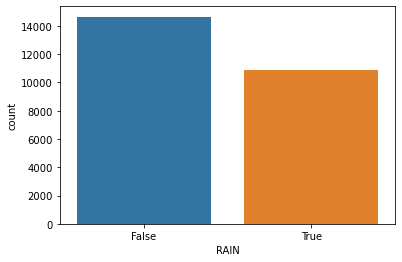

In [13]:
sns.countplot(x=df['RAIN'])

We can see from the figure above that there are **less chances of rain**. So, in the missing information, we can just insert **"False"**.

In [14]:
# def RAIN_INSERTION(RAIN):
#     if pd.isnull(RAIN):
#         return 'False'
#     else:
#         return RAIN

In [15]:
# df['RAIN']=df['RAIN'].map(RAIN_INSERTION)

#### Custom function to determine the chances of 'RAIN'

In [16]:
df['RAIN']=df['RAIN'].map(lambda x: 'False' if pd.isnull(x) else x)

#### Custom function to determine the amount of 'Precipitation'

In [17]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [18]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

#### Checking wheater our function worked. Yes it is!!

In [19]:
df.isnull().sum()

DATE        0
PRCP        0
TMAX (F)    0
TMIN (F)    0
RAIN        0
dtype: int64

#### **Exploratory Data Analysis**

#### Plot graph to determine the correlation between Precipitation and Minimum Temperature

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

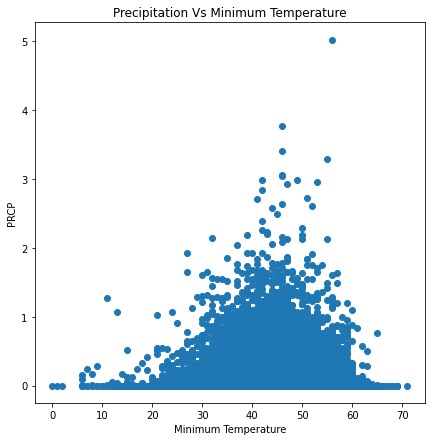

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMIN (F)',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

#### Plot graph to determine the correlation between Precipitation and Maximum Temperature

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

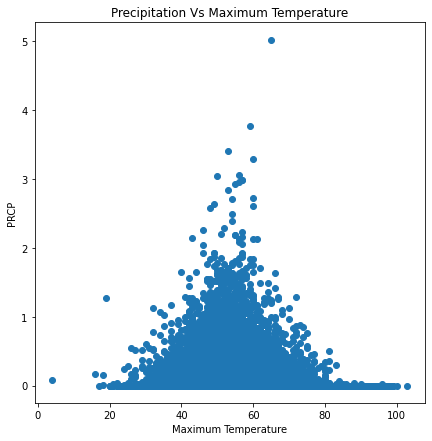

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX (F)',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')

The graph shows that when the maximum temperature is between 40 and 80 degrees, the amount of precipitation increases.

#### Plot graph to determine the overall distribution of minimum temperature

<AxesSubplot:xlabel='TMIN (F)', ylabel='Density'>

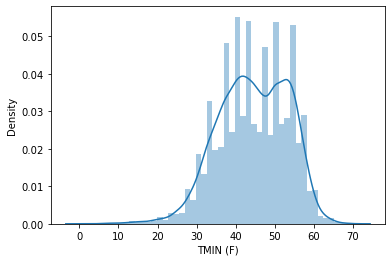

In [22]:
sns.distplot(df['TMIN (F)'])

The graph shows increasing density when the minimum temperature is between 30 to 60 degrees.

#### Plot graph to determine the overall distribution of maximum temperature 

<AxesSubplot:xlabel='TMAX (F)', ylabel='Density'>

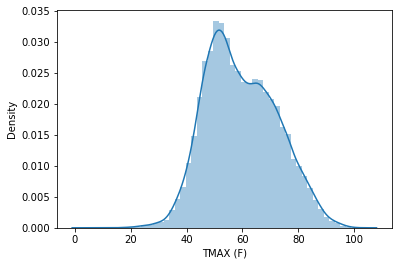

In [23]:
sns.distplot(df['TMAX (F)'])

The graph shows increasing density when the maximum temperature is between 40 to 60 degrees.

#### Plot graph to determine the outliers in precipitation, maximum temperature, and minimum temperature

<AxesSubplot:>

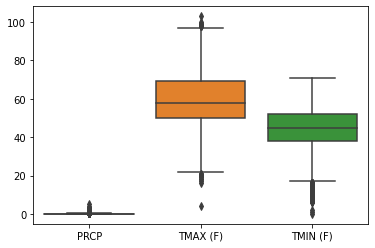

In [24]:
sns.boxplot(data=df)

From the above figure, we can say that there are **some outliers**.

##### **Outlier Treatment**

Let's remove the outliers from the data.

In [25]:
df=df.drop(df[df['TMIN (F)']<17 ].index)

In [26]:
df=df.drop(df[(df['TMAX (F)']>97.5) | (df['TMAX (F)']< 21.5)].index)

In [27]:
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

##### Let's check whether the outliers are removed or not.

<AxesSubplot:>

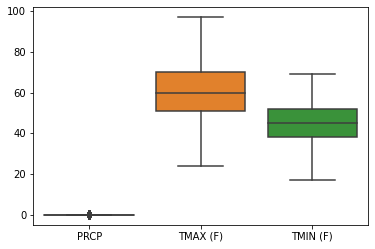

In [28]:
sns.boxplot(data=df)

#### Importing Logistic Regression Model

In [29]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
#Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split

In [32]:
df.head()

,DATE,PRCP,TMAX (F),TMIN (F),RAIN
4,1948-01-05,0.17,45,32,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
10,1948-01-11,0.01,42,32,True
11,1948-01-12,0.00,41,26,False


In [33]:
#Splitting of data as X (Features) and y (Target or label) happens here.
X=df.drop(['RAIN','DATE'],axis=1)
y=df['RAIN'].astype('str')

In [34]:
#Confirming whether it got splitted properly.
print(X.shape)
print(y.shape)

(21893, 3)
(21893,)


In [35]:
#The X and y got splitted as 70% for training purpose and 30% for testing purpose here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [36]:
#Training the model by exposing it to training data.
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
#The model predicting the values of target from unexposed X_test data
pre=lr.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

#### The accuracy score is 91%. It means the model is predicting fairly well.

In [39]:
accuracy_score(y_test,pre)

0.9077344701583435

In [40]:
lr.score(X_test,y_test)

0.9077344701583435